In [1]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
from PIL import ImageFilter
from matplotlib import animation
from PIL import ImageEnhance

from tkinter import filedialog
import tkinter as tk

import pickle

from os import sys

import matplotlib.pyplot as plt
import argparse

from statistics import mean
import os

%matplotlib inline

# for loading array 
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
import pandas as pd
import numpy as np
import mat4py


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')

from LibrairieNico.HitsFctClass import smooth, calculateNewSize

from LibrairieNico.HitFindPeacks import FindReferenceSystem

327.1
434.70000000000005
[ 460 2848]
461
[461, 463, 464, 464, 462, 462, 462, 459, 461, 461, 461, 460, 459, 463, 459, 463, 459, 460, 459, 460, 461, 462, 462, 459, 460, 460, 459, 460, 463, 460, 461, 461, 462, 462, 461, 461, 460, 461, 463, 463, 462, 462, 461, 461, 461, 464, 461, 461, 462, 465, 462, 462, 464, 461, 461, 460, 466, 462, 463, 462, 461, 459, 461, 460, 461, 462, 461, 463, 461, 460, 459, 460, 461, 460, 461, 462, 461, 461, 462, 462, 461, 465, 461, 461, 460, 461, 459, 460, 462, 460, 461, 460, 459, 462, 459, 459, 459, 460, 462, 466, 472, 472, 462, 460, 460, 458, 459, 459, 457, 460, 464, 466, 470, 469, 467, 466, 467, 469, 461, 453, 442, 440, 449, 458, 464, 475, 487, 491, 487, 472, 461, 449, 433, 431, 432, 438, 455, 464, 479, 488, 490, 482, 469, 453, 435, 431, 432, 441, 454, 463, 477, 486, 488, 480, 464, 455, 441, 436, 440, 453, 463, 480, 486, 484, 474, 466, 459, 451, 440, 433, 441, 453, 461, 470, 481, 481, 479, 469, 464, 454, 442, 442, 445, 454, 460, 466, 472, 472, 467, 465, 460, 458

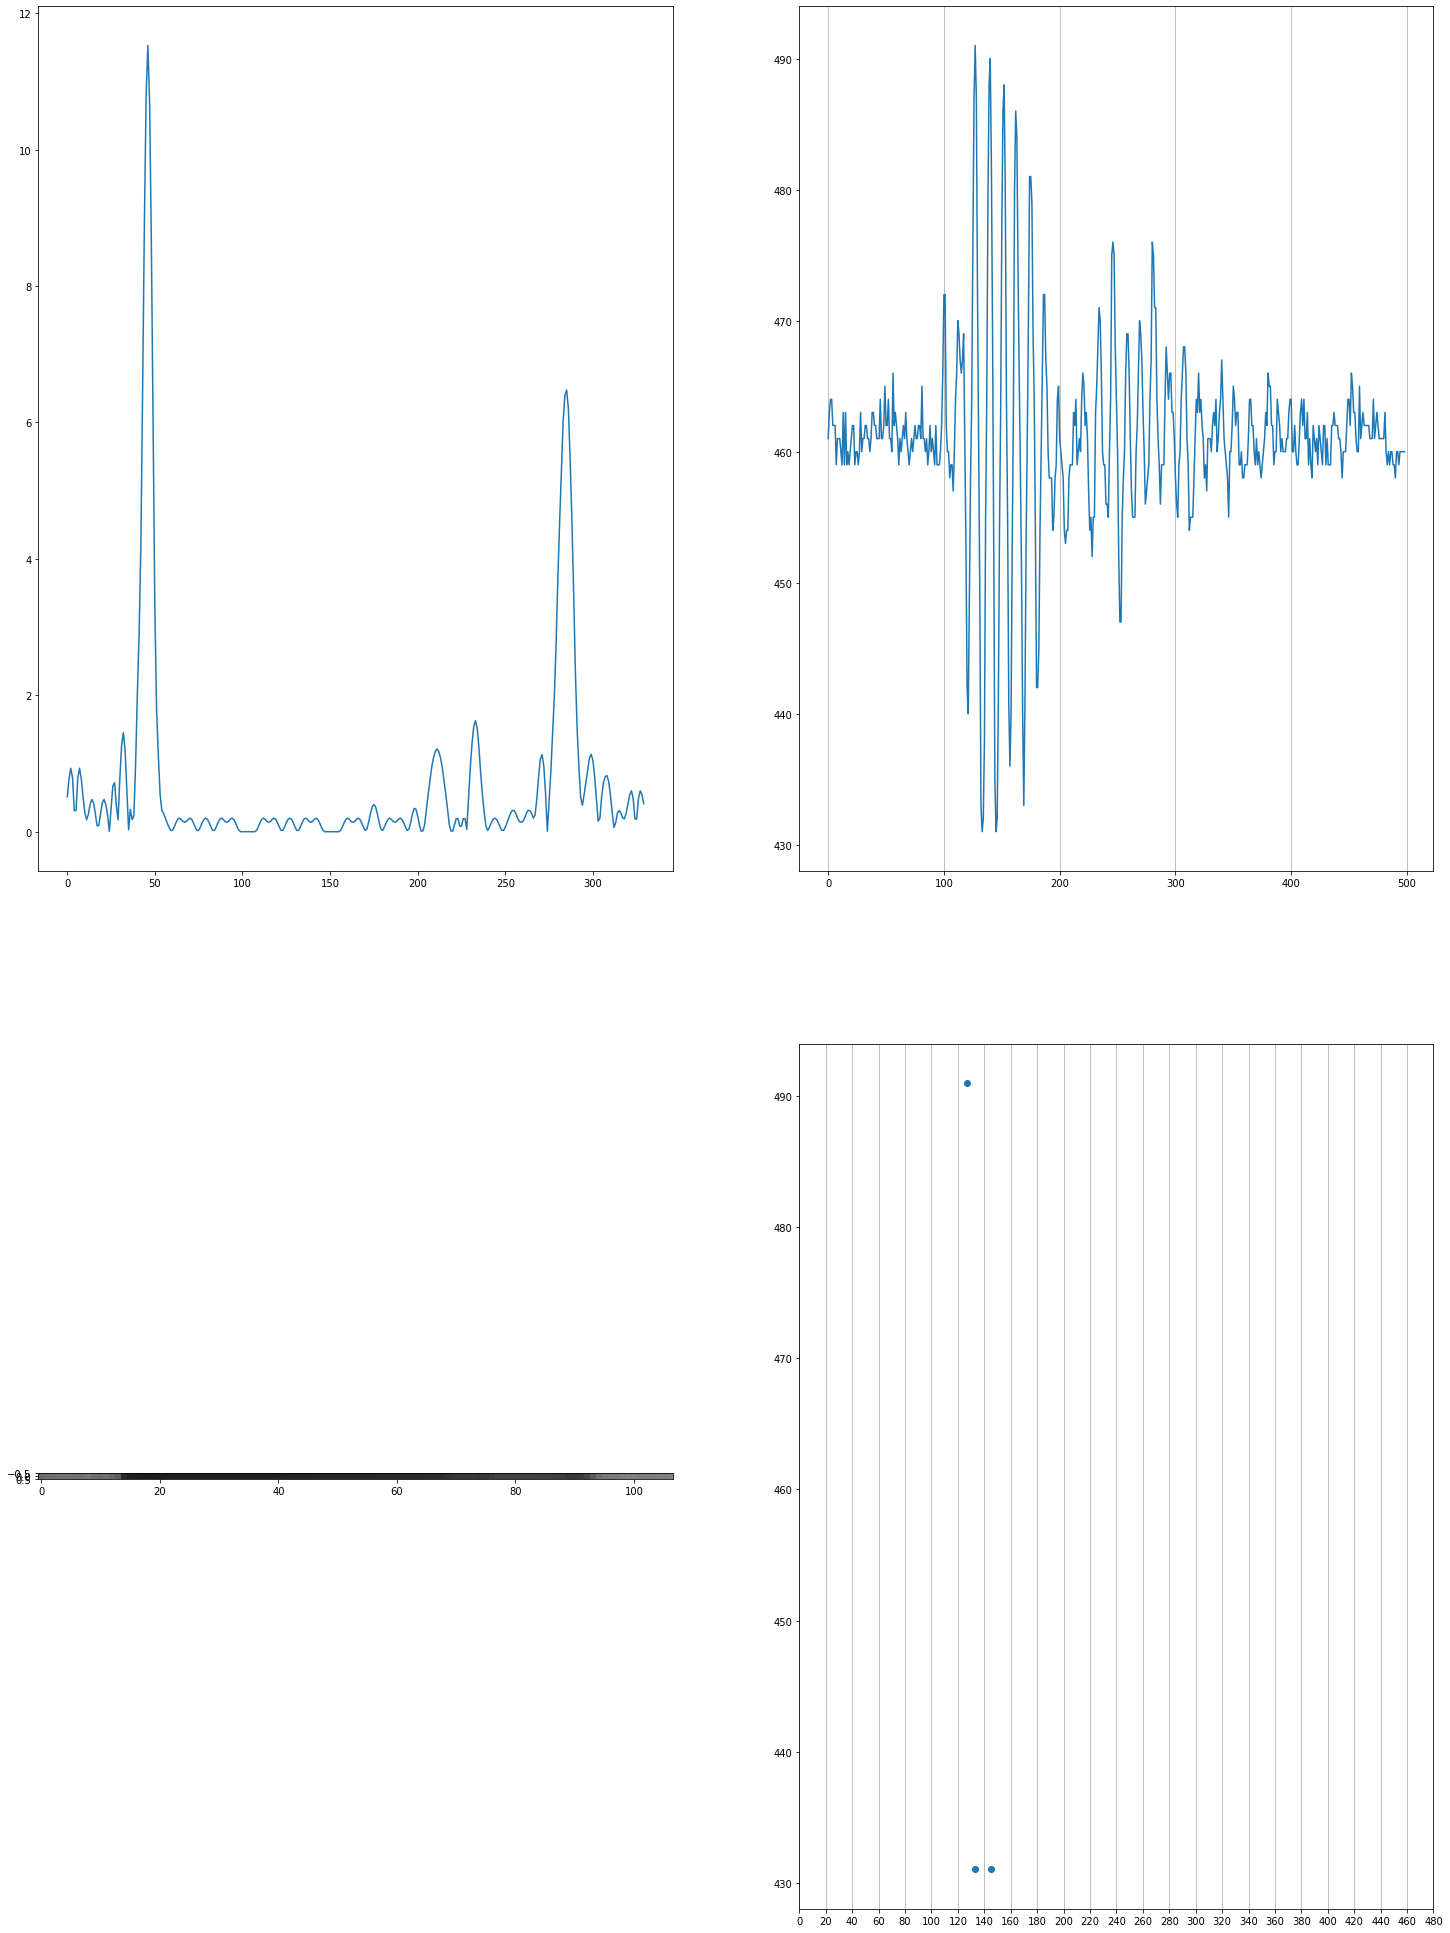

interactive(children=(IntSlider(value=1, description='time', max=500), FloatSlider(value=1.0, description='Bri…

In [2]:

video_path = r"C:\Users\nkhefif\Desktop\Extraits_BHV_test_hits\Mouse25_2020-02-10T15.15.03.avi"

HandleBEHAV = cv2.VideoCapture(video_path, 0)
#HandleVSD = cv2.VideoCapture(r'C:\Users\Nicolas\Desktop\Mouse17_Correl_BVH_VSD_test\Session4_trial4\S04-T04_2.mov')

length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))


ListObj1 = []
ListObj2 = []





Reference_peaks, frame = FindReferenceSystem(video_path)

###### Mask for object location on a video on one frame (out of loop interaction) #####


### Creation du mask en ligne pour l'objet à analyser 
### à garder pour changer les coordonnées du mask, assez simple ici :

#mask = np.zeros(IMG0.shape[:2], np.uint8)
#mask[140:145, 310:450] = 255
#masked_img = cv2.bitwise_and(IMG0,IMG0,mask = mask)
#fig = plt.figure(figsize = (15,25))

#plt.subplot(221), plt.imshow(masked_img, 'gray')
#display(linemask)
#print(IMG0)



####### Creation de la ligne de pixels  #########

                ## loading
print(Reference_peaks[0])
print(Reference_peaks[1])

for framne_nb in range(length-1) :


    _ , IMG1 = HandleBEHAV.read()

    linemask2 = IMG1[140:141, int(Reference_peaks[0]):int(Reference_peaks[1])]
    
    ##############

    linemask3 = linemask2

    lineIMG = linemask3.copy()

    linemask3 = linemask3.flatten()

    smoothmask = smooth(linemask3)

    diffmask = np.diff(smoothmask,n=1)

    X = np.arange(0,np.size(diffmask),1)
    Xinterp = np.arange(0,np.size(diffmask),0.1)

    f2 = interp1d(X, abs(diffmask), kind='cubic', fill_value="extrapolate")
    DPeaks , values = sig.find_peaks(f2(Xinterp), height = 5.5)

    if np.size(DPeaks) == 2:
         
        ListObj1.append(DPeaks[0])
        ListObj2.append(DPeaks[1])
            #print('2 peaks found at frame : {}, {}'.format(framne_nb, Peaks))
            
    else :
       
        ListObj1.append(np.nan)


print(DPeaks)
print(ListObj1[0])
print(ListObj1)
print(ListObj2)

#on cree les parametres tresholding pour les var d intensite des pics de la liste ListObj1 en +/- car fct abs sur l affichage du subplot
#donc l'analyse se fait sur les deux valeurs

Listpeaks = []
Listframe = []    

SD = np.nanstd(ListObj1)
MeanPeaks = np.nanmean(ListObj1)


print('La standard deviation est de :', (SD))
print('La moyenne des peaks est de :', (MeanPeaks))



##### On sort les valeurs des peaks différents à un treshold déterminé par app à la moyenne +/-SD, de manière à pouvoir être fait sur chaque vidéo ###
for framne_nb in range(length-1) :

    if ListObj1[framne_nb] >= (MeanPeaks + (4 * SD)) :
        Listframe.append(framne_nb)
        Listpeaks.append(ListObj1[framne_nb])

    elif ListObj1[framne_nb] <= (MeanPeaks - (4 * SD)) :
        Listframe.append(framne_nb)
        Listpeaks.append(ListObj1[framne_nb])



print('La liste des frames inclues dans l\'interval (mean +/- 4 * SD) est :', (Listframe))  
print('La liste des peaks correspondant est :', (Listpeaks))



###
###
print(os.path.dirname(video_path))
print(os.path.basename(video_path))

#my_file = open(my_path, 'wb')
#my_file = pickle.dump("data_to_save", my_file)
#my_file.close()



## Enre Pickles ##

if len(Listframe) == 0: 
    pass
else:
    outfile = os.path.join(os.path.dirname(video_path), os.path.basename(video_path) [:-4] + '_Hits.pckl')

    with open(outfile,'wb') as pickleHandle:
        whatever = pickle.dump(Listframe, pickleHandle)


    
    
    
    
fig = plt.figure(figsize = (25,35))


plt.subplot(221), plt.plot(abs(diffmask))

#plt.subplot(222), plt.plot(abs(smooth(np.asarray(ListObj1)-MeanPeaks)))

plt.subplot(222), plt.plot(np.asarray(ListObj1))
#plt.xticks(range(0, 540, 20))
#plt.yticks(range(200, 500, 30))
plt.grid(axis="x")

plt.subplot(223), plt.imshow(lineIMG, 'gray')

plt.subplot(224), plt.plot(Listframe, Listpeaks, 'o')
plt.xticks(range(0, 500, 20))
#plt.yticks(range(200, 700, 10))
plt.grid(axis="x")


    #plt.subplot(224), plt.plot(Xinterp,f2(Xinterp))

            #linemask = np.swapaxes(linemask,0, 1)
            #plt.ylim(255, 0)
            #print(Xinterp)





@interact

def show_image(time=widgets.IntSlider(min=0,max=length,step=1,value=1), \
Brightness=widgets.FloatSlider(min=0,max=4,step=0.015,value=1), \
binarization=widgets.FloatSlider(min=-1,max=2,step=0.01,value=-1), \
Denoise = False, VSD=False, substract= False, EnhanceEdge=False, EnhanceEdgeMore=False ):


    HandleBEHAV.set(cv2.CAP_PROP_POS_FRAMES, time)
    _ , BEHi = HandleBEHAV.read()


    #HandleVSD.set(cv2.CAP_PROP_POS_FRAMES, time)
    #_ , VSDi = HandleVSD.read() 
    #VSDi = cv2.cvtColor(VSDi, cv2.COLOR_BGR2RGB)

    output = BEHi
    fig = plt.figure(figsize = (20,30))
    plt.imshow(output, interpolation='none')
    #cv2.line(HandleBEHAV, 240, 540, 'r', 1)

